# Data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories
from make_json import parameter_names

Neighboring files:
Removed JSON file: ANNEALING\parameters_0.json
Removed JSON file: ANNEALING\parameters_1.json
Removed JSON file: ANNEALING_MID\parameters_1.json
Removed JSON file: ANNEALING_MID\parameters_2.json
Removed JSON file: ANNEALING_MID\parameters_3.json
Removed JSON file: ANNEALING_MID\parameters_4.json
Removed JSON file: ANNEALING_SLOPE\parameters_1.json
Removed JSON file: ANNEALING_SLOPE\parameters_2.json
Removed JSON file: ANNEALING_SLOPE\parameters_3.json
Removed JSON file: ANNEALING_SLOPE\parameters_4.json
Removed JSON file: ANNEALING_SLOPE\parameters_5.json
Removed JSON file: ANNEALING_SLOPE\parameters_6.json
Removed JSON file: BG_NOISE\parameters_0.05.json
Removed JSON file: BG_NOISE\parameters_0.1.json
Removed JSON file: BG_NOISE\parameters_0.2.json
Removed JSON file: BG_NOISE\parameters_0.3.json
Removed JSON file: BG_NOISE\parameters_0.5.json
Removed JSON file: LEARNING_RATE_HL\parameters_0.0001.json
Removed JSON file: LEARNING_RATE_HL\parameters_0.json
Removed JSO

In [2]:
neighbouring_directories = find_neighboring_directories()
# import .npy files from neighbouring directories
data = {}
parameter_values = {}
for directory in neighbouring_directories:
    print(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename.startswith("overall"):
            filepath = os.path.join(directory, filename)
            data[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("parameter_values"):
            filepath = os.path.join(directory, filename)
            parameter_values[directory] = np.load(filepath)

print(data.keys())
print(parameter_values)

ANNEALING
ANNEALING_MID
ANNEALING_SLOPE
BG_NOISE
LEARNING_RATE_HL
LEARNING_RATE_RL
N_BG_CLUSTERS
N_DISTRACTORS
RA_NOISE
RA_SIG_SLOPE
REWARD_WINDOW
TARGET_WIDTH
dict_keys(['ANNEALING', 'ANNEALING_MID', 'ANNEALING_SLOPE', 'BG_NOISE', 'LEARNING_RATE_HL', 'LEARNING_RATE_RL', 'N_BG_CLUSTERS', 'N_DISTRACTORS', 'RA_NOISE', 'RA_SIG_SLOPE', 'REWARD_WINDOW', 'TARGET_WIDTH'])
{'ANNEALING': array([1., 0.]), 'ANNEALING_MID': array([2., 4., 3., 1.]), 'ANNEALING_SLOPE': array([2., 4., 3., 1., 6., 5.]), 'BG_NOISE': array([0.5 , 0.2 , 0.1 , 0.05, 0.3 ]), 'LEARNING_RATE_HL': array([1.e-05, 1.e-04, 2.e-05, 5.e-05, 0.e+00]), 'LEARNING_RATE_RL': array([0.2 , 0.1 , 0.05, 0.4 , 0.01]), 'N_BG_CLUSTERS': array([ 2., 10.]), 'N_DISTRACTORS': array([20., 50., 10.,  5.]), 'RA_NOISE': array([0.02, 0.1 , 0.05, 0.  , 0.01]), 'RA_SIG_SLOPE': array([18.,  9.]), 'REWARD_WINDOW': array([50., 10., 25.,  5.]), 'TARGET_WIDTH': array([0.7, 0.5, 0.2, 0.1, 0.3])}


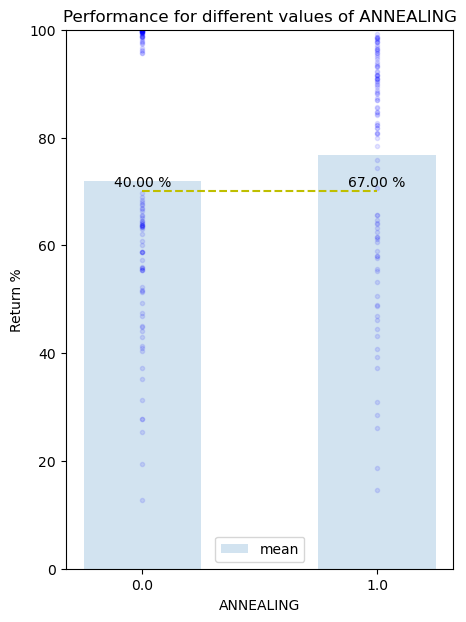

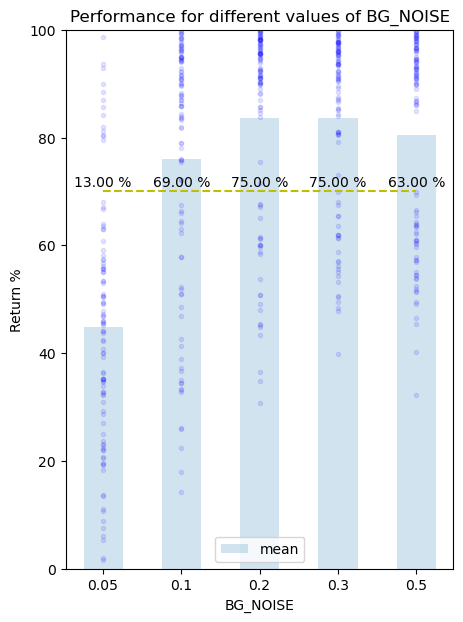

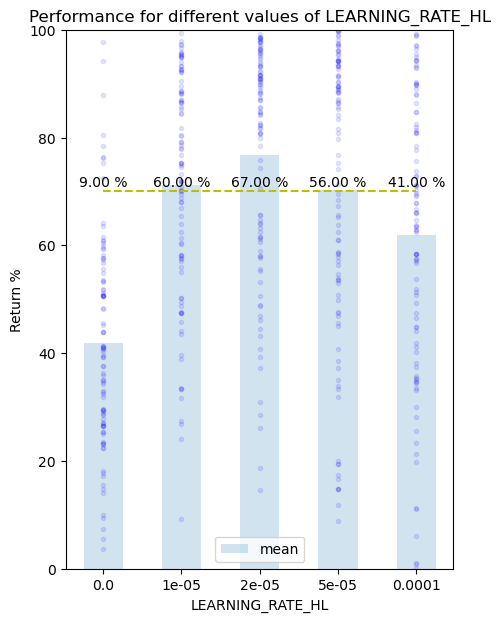

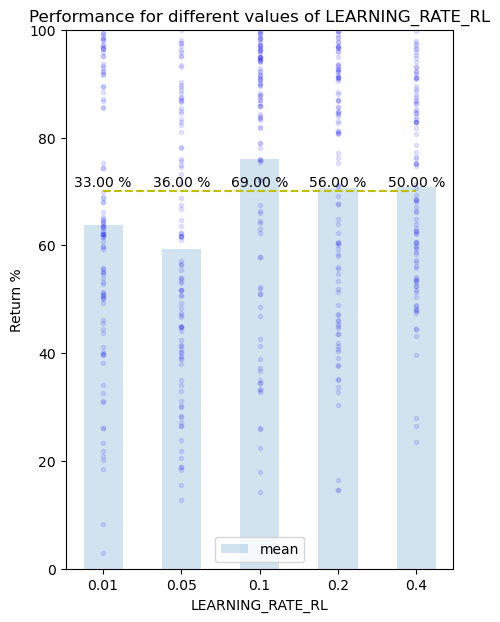

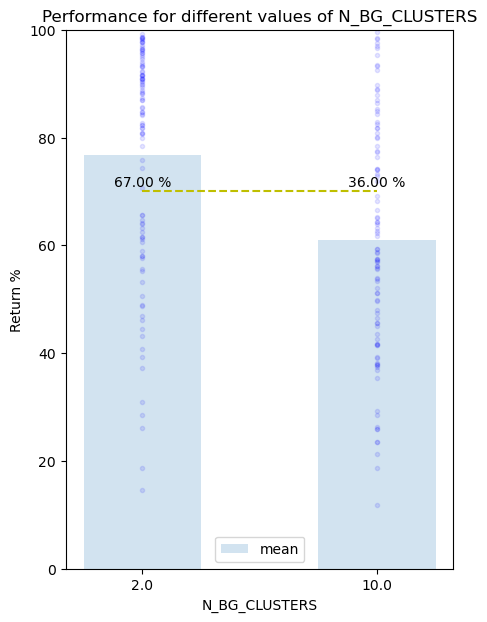

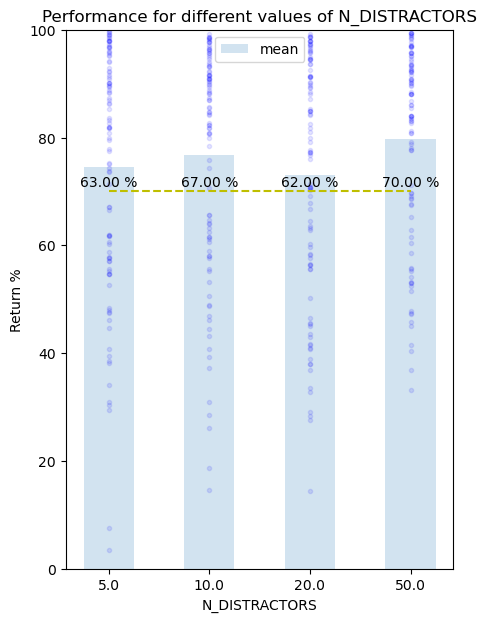

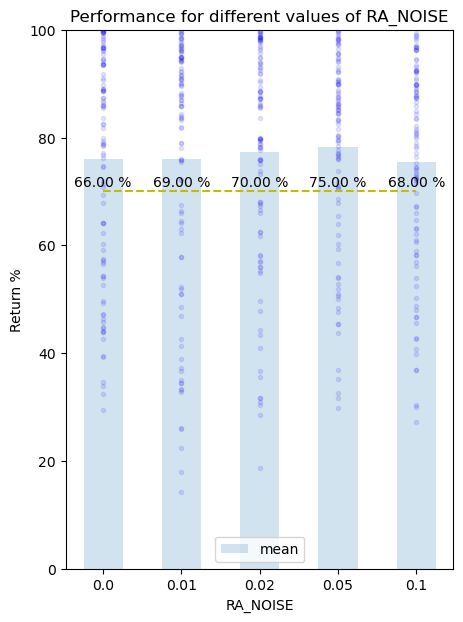

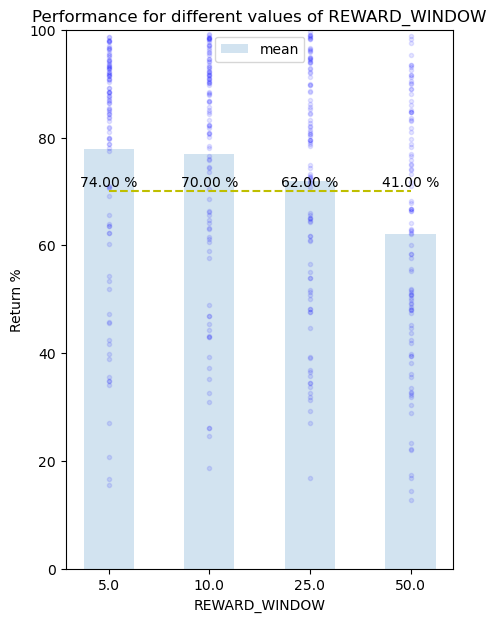

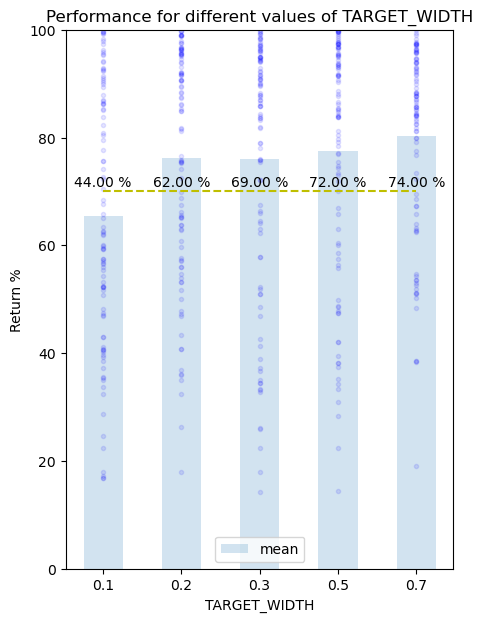

In [7]:
# def plot_returns(data, key):
for index, directory in enumerate(neighbouring_directories):
    if directory in ["ANNEALING", "BG_NOISE", "LEARNING_RATE_HL", "LEARNING_RATE_RL", "RA_NOISE", "N_BG_CLUSTERS", "N_DISTRACTORS", "REWARD_WINDOW", "TARGET_WIDTH"]:
        param = directory
        returns = 100 * data[directory]
        parameter_values_sorted = sorted(parameter_values[directory])  # Sort parameter values
        sorted_indices = np.argsort(parameter_values[directory])  # Get sorting indices

        # Arrange returns based on sorted parameter values
        returns = returns[:, sorted_indices]

        n_values = len(parameter_values_sorted)
        above_threshold = np.zeros(n_values)
        for i in range(n_values):
            above_threshold[i] = np.sum(returns[:, i] > 70)

        above_threshold /= returns.shape[0]
        plt.figure(figsize=(5,7))
        means = np.mean(returns, axis=0)
        std = np.std(returns, axis=0)
        # Use plt.bar for means with error bars for std
        plt.bar(range(n_values), means, label='mean', alpha=0.2, width=0.5)
        for i in range(n_values):
            plt.plot(i * np.ones_like(returns[:, i]), returns[:, i], '.', alpha = 0.1, color='b')
        plt.ylim(0, 100)
        for i in range(n_values):
            plt.text(i, 71, f"{100*above_threshold[i]:.2f} %", ha='center')
        plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
        plt.xticks(np.arange(n_values, step=1), labels=parameter_values_sorted)
        plt.title(f'Performance for different values of {param}')
        plt.xlabel(param)
        plt.ylabel('Return %')
        plt.legend()
        plt.show()


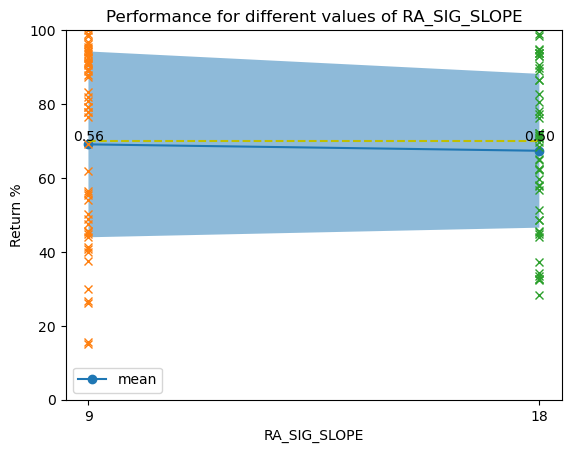

In [5]:
directory = 'RA_SIG_SLOPE'
param = directory
returns = 100*data[directory]
n_values = min(returns.shape)
above_threshold = np.zeros(n_values)
for i in range(n_values):
    above_threshold[i] = np.sum(returns[:,i] > 70)
above_threshold /= returns.shape[0]
plt.figure()
means = np.mean(returns, axis=0)
std = np.std(returns, axis=0)
plt.plot(means, label='mean', marker='o')
plt.fill_between(range(n_values), means-std, means+std, alpha=0.5)
for i in range(n_values):
    plt.plot(i*np.ones_like(returns[:,i]), returns[:,i], 'x')
plt.ylim(0, 100)
for i in range(n_values):
    plt.text(i, 70, f"{above_threshold[i]:.2f}", ha='center')
plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
plt.xticks(np.arange(n_values, step=1), labels = parameter_names[param])
plt.title(f'Performance for different values of {param}')
plt.xlabel(param)
plt.ylabel('Return %')
plt.legend()
plt.show()